## Snippets to illustrate the various stages of the _Data Curation Lifecycle_

### Pre-requisites

All the programs in _schematic_ require the right set of credentials files (`.synapseConfig`, `credentials.json`, `token.pickle`, `service_account_creds.json`) and configuration files (`config.yml`) to work. Follow all steps detailed in [Section 3.](https://sage-schematic.readthedocs.io/en/develop/README.html#package-installation-and-setup) of the _schematic_ [documentation](https://sage-schematic.readthedocs.io/en/develop/).

By following the above steps you will have created a virtual environment (`.venv`). To ensure that the methods from the schematic library that are called in this notebook work, you need to add the `.venv` virtual environment to Jupyter.

- Make sure the virtual environment is activated

```
$ source .venv/bin/activate
```

- Add the virtual environment to Jupyter

```
$ python -m ipykernel install --name=".venv"
```

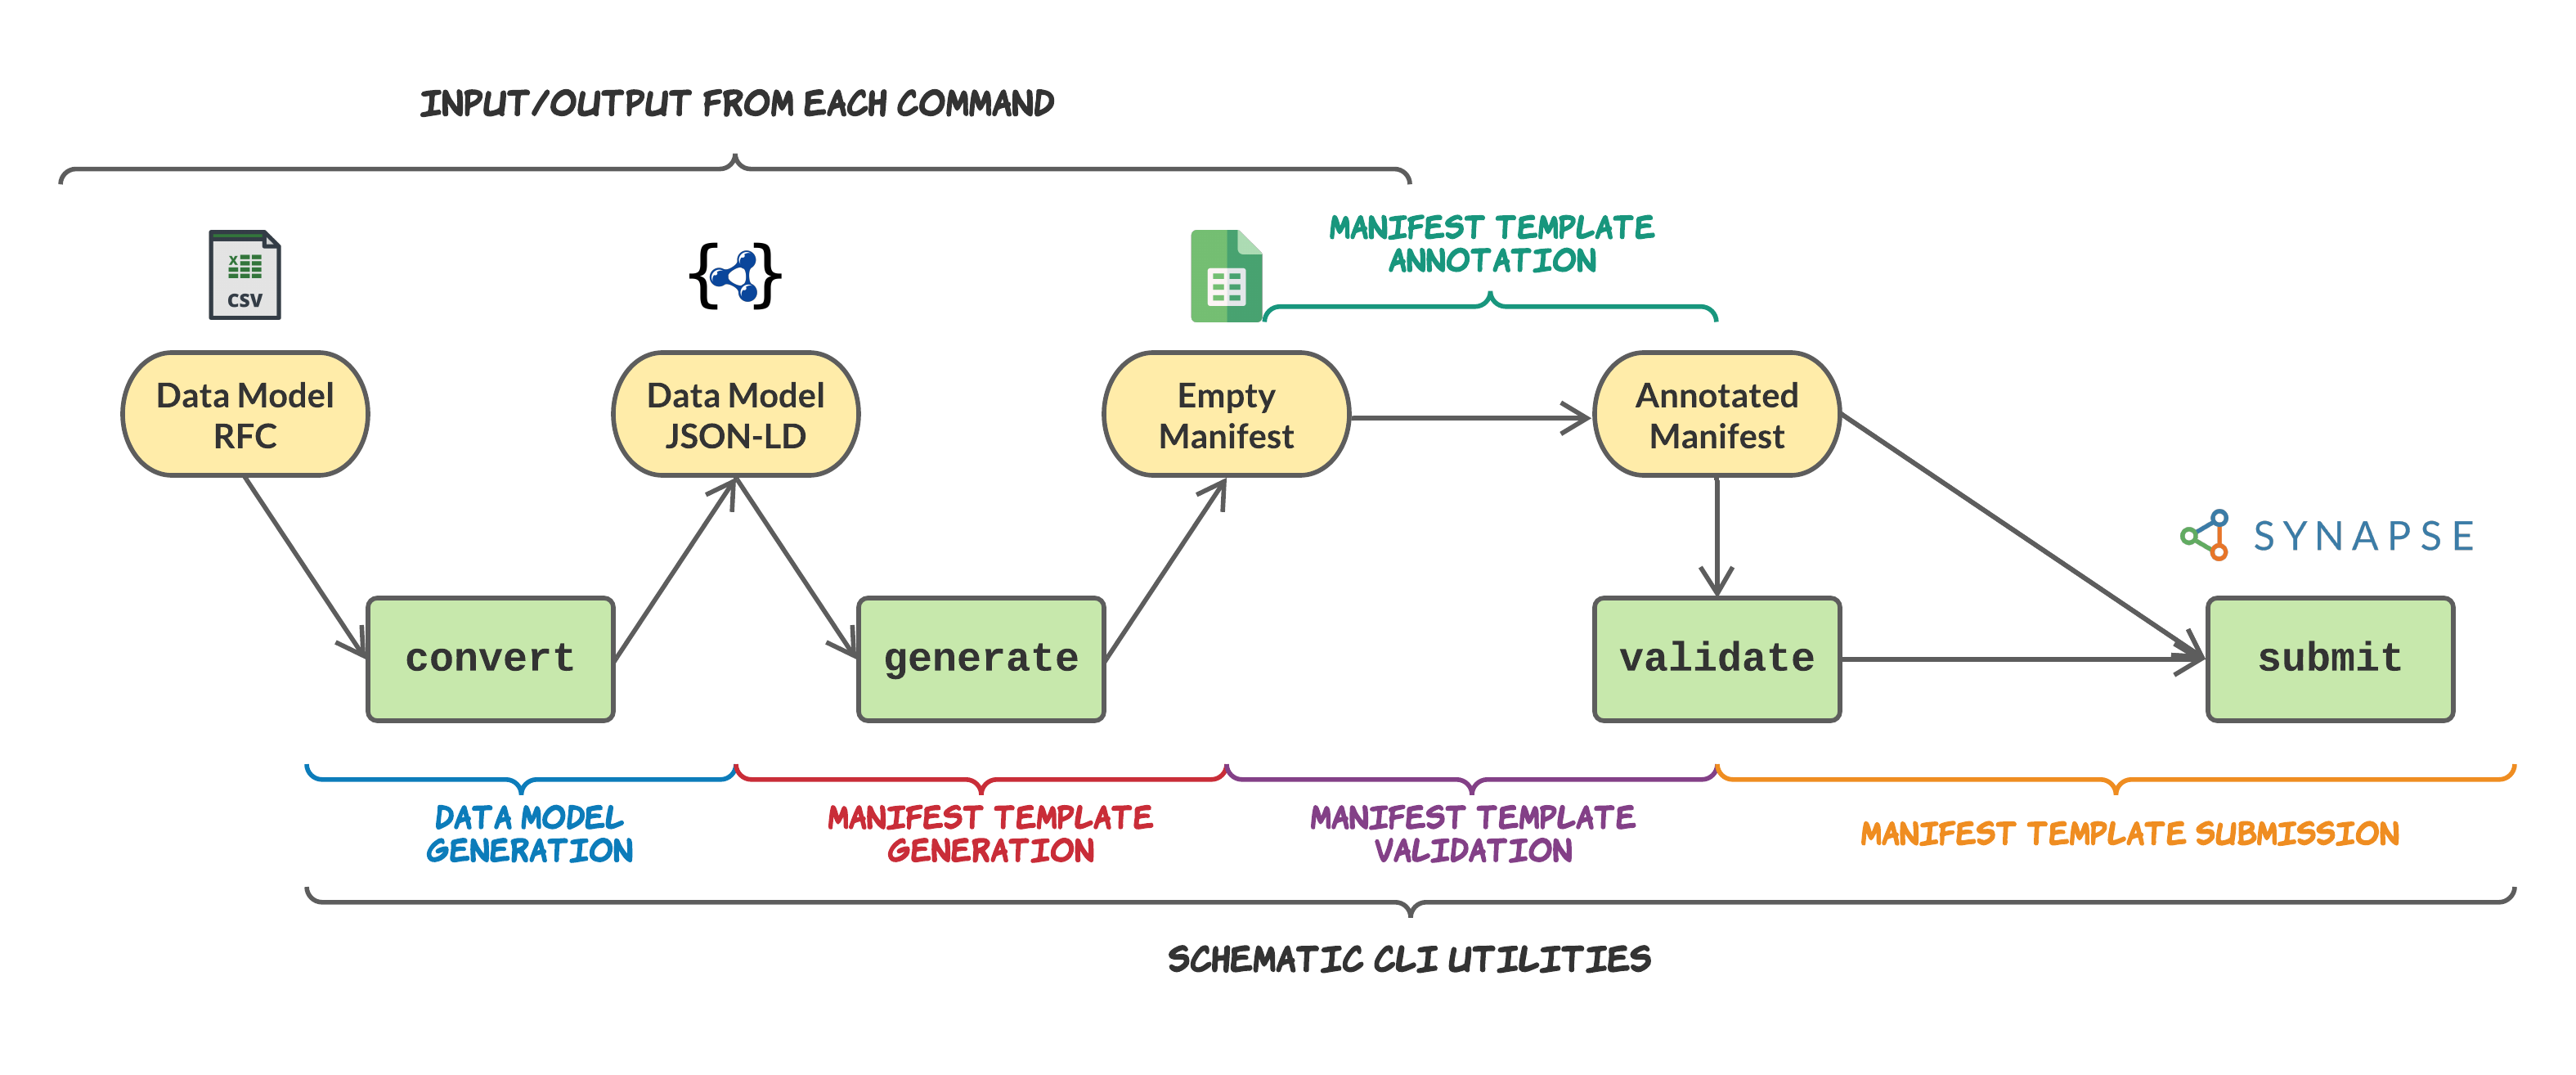

<center><i>Fig: Block diagram showing the various steps to go through while annotating a dataset</i></center>

### 1. Set `SCHEMATIC_CONFIG` environment variable to point to `config.yml`

In [1]:
%env SCHEMATIC_CONFIG=/Users/spatil/Desktop/schematic/config.yml

env: SCHEMATIC_CONFIG=/Users/spatil/Desktop/schematic/config.yml


In [2]:
import os

# check if SCHEMATIC_CONFIG environment variable has been set to the right path
print(os.environ['SCHEMATIC_CONFIG'])

/Users/spatil/Desktop/schematic/config.yml


## Generation of Empty Manifest for _Patient_ Data Type

### 2. Call `getModelManifest()` method from `MetadataModel` class to create manifest

To create an empty manifest for a particular data type, leave the `dataset_id` argument as is, in that, the application will interpret the default value of `None` for the `dataset_id` parameter as a request for an empty new manifest.

In [3]:
# MetadataModel class contains getModelManifest() method
from schematic.models.metadata import MetadataModel

# initialize object of MetadataModel class
metadata_model = MetadataModel(
    inputMModelLocation="../tests/data/example.model.jsonld",
    inputMModelLocationType="local",
)

In [4]:
# do not provide any value to dataset_id parameter
empty_manifest_url = metadata_model.getModelManifest(
    title="Patient_Manifest",
    rootNode="Patient",
    datasetId=None,
    useAnnotations=False,
    sheetUrl=True
)

# print returned url
print(empty_manifest_url)

Loading config YAML file specified in 'SCHEMATIC_CONFIG' environment variable: /Users/spatil/Desktop/schematic/config.yml
https://docs.google.com/spreadsheets/d/1Q-m0MyPjpS3wYjsrn2MJOQ13mz2Yan-3un6av_A6EK4


## Generation of Exisiting Manifest Associated with a Dataset on Synapse

### 3. Call `getModelManifest()` method with synID passed to `dataset_id` argument from `MetadataModel` class to generate existing manifest

In [5]:
# provide the synID of the dataset folder you want to retrieve the manifest for
existing_manifest_url = metadata_model.getModelManifest(
    title="Patient_Manifest",
    rootNode="Patient",
    datasetId="syn25999299",
    useAnnotations=False,
    sheetUrl=True,
)

# print returned url
print(existing_manifest_url)

https://docs.google.com/spreadsheets/d/1XJmvVN_WelJ66LxlCuV-c6XImS2bQhOlMnZI2wJc2KE


#### To view the data in the above spreadsheet as a `pandas` dataframe.

In [6]:
from IPython.display import display

existing_manifest_df = metadata_model.getModelManifest(
    title="Patient_Manifest",
    rootNode="Patient",
    datasetId="syn25999299",
    useAnnotations=False,
    sheetUrl=False,    # sheetUrl should be set to False
)

display(existing_manifest_df)

,Patient ID,Sex,Year of Birth,Diagnosis,Component,Cancer Type,Family History,entityId
0,HTAN_001,NaN,NaN,NaN,Patient,NaN,NaN,syn25999300


## Validation of Valid Manifest of _Patient_ Type

### 4. Call `validateModelManifest()` method from `MetadataModel` class to validate manifest

In [7]:
# provide valid manifest file path
errors = metadata_model.validateModelManifest(
    manifestPath="files/valid_patient_manifest.csv", 
    rootNode="Patient"
)

# empty list since we're validating a valid manifest
print(errors)

[]


## Validation of Invalid Manifest of _Patient_ Type

### 5. We are providing an _invalid_ manifest file to the validation method. So instead of returning an empty list like above, the method should return a list with each comma separated value signifying the following respectively:

#### \[ _row number_, _column name_, _description of correction_, _correction suggested_ \]

In [8]:
# provide invalid manifest file path
errors = metadata_model.validateModelManifest(
    manifestPath="files/invalid_patient_manifest.csv", 
    rootNode="Patient"
)

# list pointing out what errors exist in the provided manifest
print(errors)

ERROR: [2021-07-27 12:59:29] root - The 'Component' column value(s) [''] do not match the selected template type 'Patient'.


[[2, 'Component', "Component value provided is: '', whereas the Template Type is: 'Patient'", ('', 'Patient')]]


## Submission of Valid Manifest of _Patient_ Type

### 6. Call `submit_metadata_manifest()` method from `MetadataModel` class to validate manifest

In [9]:
# test the upload of a valid manifest file
success = metadata_model.submit_metadata_manifest(
    manifest_path="files/valid_patient_manifest.csv",
    dataset_id="syn25995579",
    validate_component="Patient",
)

# returns True if the upload is successful
print(success)


##################################################
 Uploading file to Synapse storage 
##################################################



INFO: [2021-07-27 12:59:35] synapseclient_default - 
##################################################
 Uploading file to Synapse storage 
##################################################



True


## Submission of Invalid Manifest of _Patient_ Type

### 7. Submitting an _invalid_ manifest will result in a `ValidationError` Exception being raised

In [ ]:
# test the upload of an invalid manifest file
error = metadata_model.submit_metadata_manifest(
    manifest_path="files/invalid_patient_manifest.csv",
    dataset_id="syn25995579",
    validate_component="Patient",
)

# the program will raise an appropriate Exception
print(error)

ERROR: [2021-07-27 12:59:43] root - The 'Component' column value(s) [''] do not match the selected template type 'Patient'.
